In [1]:
import warnings 
warnings.filterwarnings("ignore") # 忽略警告消息
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.metrics import confusion_matrix as CM
import numpy as np
from  sklearn.metrics import roc_curve as ROC
from sklearn.metrics import auc
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
# Jupyter notebook 中的魔法命令 ，在下面的代码模块里面都可以不用写 plt.show() 交互式显示图片
%matplotlib inline  
%config InlineBackend.figure_format = 'svg'  # 提高图片分辨率

In [2]:
data= pd.read_excel("建模相关数据.xlsx")

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,市州,县市区,城乡,社区,年龄,性别,民族,文化程度,...,bmi分组,WhtR分组,WHR分组,BAI分组,PI分组,CI分组,ABSI分组,BRI分组,AVI分组,HI分组
0,0,5417,1,106,1,旺达,62,1,1,2,...,2,2,2,2,2,2,2,2,2,2
1,1,5418,1,106,1,飞跃,28,1,1,2,...,2,2,2,1,2,2,1,2,2,2
2,2,5419,1,106,1,汽车产业开发区,53,2,1,3,...,2,2,2,2,2,2,2,2,2,2
3,3,5420,1,106,1,春城,41,2,1,4,...,2,1,1,2,2,1,1,1,2,2
4,4,5421,1,106,1,旺达,59,2,1,2,...,1,1,1,2,1,2,2,1,1,2


In [4]:
# 赋值 糖尿病患者为1，非糖尿病患者为0
for i in range(data.shape[0]):
    if data.loc[i,"糖尿病患者"] == 2:
        data.loc[i,"糖尿病患者"] = 0
    else:
        data.loc[i,"糖尿病患者"] = 1 

In [5]:
data["糖尿病患者"].value_counts()

0    2233
1     247
Name: 糖尿病患者, dtype: int64

In [6]:
# 特征矩阵
X = data[['BMI','WhtR','WHR','BAI','PI','CI','ABSI','BRI','AVI','HI']]

In [7]:
# 标签
Y = data['糖尿病患者']

In [8]:
# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)

In [9]:
# 使测试集和训练集的索引按顺序排列
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [10]:
# 样本是否均衡:样本不均衡
Ytrain.value_counts()[1]/Ytrain.value_counts().sum()

0.0967741935483871

In [11]:
Ytest.value_counts()[1]/Ytest.value_counts().sum()

0.10618279569892473

BMI的阈值是(22.99397235347029, 0.8392857142857143, 0.40880102040816324)
BMI的准确率是0.43951612903225806灵敏度是0.7721518987341772特异度是0.4
WhtR的阈值是(0.5201238390092879, 0.7380952380952381, 0.5886479591836735)
WhtR的准确率是0.6075268817204301灵敏度是0.6455696202531646特异度是0.6030075187969924
WHR的阈值是(0.8709677419354839, 0.7797619047619048, 0.5918367346938775)
WHR的准确率是0.592741935483871灵敏度是0.6835443037974683特异度是0.5819548872180451
BAI的阈值是(27.48531378694481, 0.6904761904761905, 0.49362244897959184)
BAI的准确率是0.4838709677419355灵敏度是0.5949367088607594特异度是0.4706766917293233
PI的阈值是(14.57827851427937, 0.7202380952380952, 0.5095663265306123)
PI的准确率是0.5282258064516129灵敏度是0.6962025316455697特异度是0.5082706766917293
CI的阈值是(1.238038791093136, 0.7023809523809523, 0.6473214285714286)
CI的准确率是0.6182795698924731灵敏度是0.5569620253164557特异度是0.6255639097744361
ABSI的阈值是(0.07839250203316543, 0.7083333333333334, 0.5752551020408163)
ABSI的准确率是0.5524193548387096灵敏度是0.5822784810126582特异度是0.5488721804511278
BRI的阈值是(3.744036946961387, 0.73809523809523

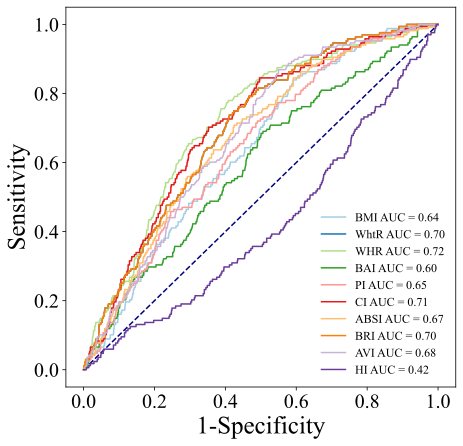

In [13]:
# 对测试集画ROC曲线：
def Find_Optimal_Cutoff(TPR, FPR, threshold):
    y = TPR - FPR
    Youden_index = np.argmax(y)  # Only the first occurrence is returned.
    optimal_threshold = threshold[Youden_index]
    A=FPR[Youden_index]
    optimal_FPR=1-A
    optimal_TPR=TPR[Youden_index]
    point = [FPR[Youden_index], TPR[Youden_index]]
    return optimal_threshold,optimal_TPR,optimal_FPR

# plt.style.use("classic")
plt.rc('font',family='Times New Roman')  # 将全局字体改为Times New Roman
lw = 1.5 
plt.figure(figsize=(7,7),facecolor='white')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tick_params(labelsize=20)
plt.xlabel('1-Specificity',fontsize=25)
plt.ylabel('Sensitivity',fontsize=25)
name = [ 'BMI', 'WhtR', 'WHR', 'BAI', 'PI', 'CI', 'ABSI', 'BRI', 'AVI', 'HI']
for i in range(len(name)):
    X0= Xtrain[Xtrain.columns[i]]
    X0= np.array(X0).tolist()
    X_=[]
    for u in X0:
        X_.append([u])
    y= Ytrain

    fpr,tpr,threshold = ROC(y, X_) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
    print("%s的阈值是%s"%(name[i],Find_Optimal_Cutoff(tpr,fpr,threshold)))

    plt.plot(fpr, tpr, color=plt.get_cmap('Paired')(i),
         lw=lw, label='%s AUC = %0.2f' % (name[i],roc_auc)) ###假正率为横坐标，真正率为纵坐标做曲线

    plt.legend(frameon=False,loc="lower right",fontsize=12) 
    # plt.tick_params(direction='out',top='off',bottom='on',left='on',right='off')  # 刻度线的显示方向
    # plt.tick_params(top='off',bottom='on',left='on',right='off') # 在哪些轴上显示刻度
    plt.savefig(".'" + "ROC测试" + "'.png",dpi=300)
    ypre = []
    for j in range(Xtest.shape[0]):
        if Xtest.loc[j,name[i]] > Find_Optimal_Cutoff(tpr,fpr,threshold)[0]:
            ypre.append(1)
        else:
            ypre.append(0)
    cm = CM(Ytest,ypre,labels=(1,0))
    specificity = cm[1,1]/cm[1,:].sum()
    sensitivity = cm[0,0]/cm[0,:].sum()
    accuracy = (cm[0,0]+cm[1,1])/(cm[1,:].sum()+cm[0,:].sum())
    print("%s的准确率是%s灵敏度是%s特异度是%s"%(name[i],accuracy,sensitivity,specificity))
 

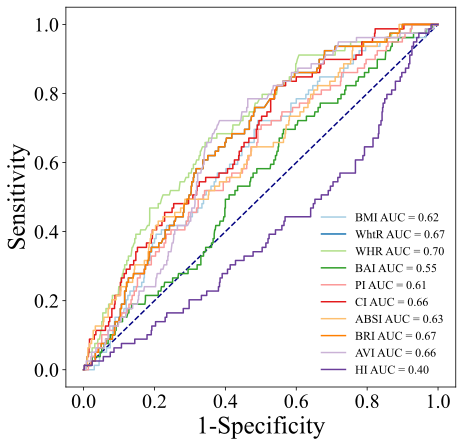

In [16]:
# 对训练集画ROC曲线：
# plt.style.use("classic")
plt.rc('font',family='Times New Roman')  # 将全局字体改为Times New Roman
lw = 1.5 
plt.figure(figsize=(7,7),facecolor='white')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tick_params(labelsize=20)
plt.xlabel('1-Specificity',fontsize=25)
plt.ylabel('Sensitivity',fontsize=25)
name = [ 'BMI', 'WhtR', 'WHR', 'BAI', 'PI', 'CI', 'ABSI', 'BRI', 'AVI', 'HI']
for i in range(len(name)):
    X0= Xtest[Xtest.columns[i]]
    X0= np.array(X0).tolist()
    X_=[]
    for u in X0:
        X_.append([u])
    y= Ytest

    fpr,tpr,threshold = ROC(y, X_) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值

    plt.plot(fpr, tpr, color=plt.get_cmap('Paired')(i),
         lw=lw, label='%s AUC = %0.2f' % (name[i],roc_auc)) ###假正率为横坐标，真正率为纵坐标做曲线

    plt.legend(frameon=False,loc="lower right",fontsize=12) 
    # plt.tick_params(direction='out',top='off',bottom='on',left='on',right='off')  # 刻度线的显示方向
    # plt.tick_params(top='off',bottom='on',left='on',right='off') # 在哪些轴上显示刻度
    plt.savefig(".'" + "ROC训练" + "'.png",dpi=300)

In [15]:
# Xtest.to_excel("Xtest.xlsx")
# Xtrain.to_excel("Xtrain.xlsx")
# Ytest.to_excel("Ytest.xlsx")
# Ytrain.to_excel("Ytrain.xlsx")

In [16]:
# 使用LabelEncoder给标签赋值，实例化后进行训练，此处标签符合数值型，不用操作
# encoder = LabelEncoder().fit(Ytrain)
# Ytrain = pd.DataFrame(encoder.transform(Ytrain))
# Ytest = pd.DataFrame(encoder.transform(Ytest))

In [ ]:
# 进入随机森林建模


In [17]:
# 进入svm建模
# 无量纲化
col = X.columns.tolist()
ss =StandardScaler().fit(Xtrain.loc[:,col])
Xtrain.loc[:,col]=ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col]=ss.transform(Xtest.loc[:,col])

In [18]:
# 将Ytrain展开成横向排列
Ytrain = pd.DataFrame(Ytrain)
Ytrain = Ytrain.iloc[:,0].ravel()
Ytest = pd.DataFrame(Ytest)
Ytest = Ytest.iloc[:,0].ravel()

In [19]:
#选择合适的核函数
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             #,degree = 1
             ,cache_size = 5000
             ,class_weight = "balanced"
             ).fit(Xtrain, Ytrain)
    #训练集结果
    result_train = clf.predict(Xtrain)
    score_train = clf.score(Xtrain,Ytrain)
    recall_train = recall_score(Ytrain, result_train)
    CM_2= CM(Ytrain, result_train,labels=[1,0])
    auc_train = roc_auc_score(Ytrain,clf.decision_function(Xtrain))
    specificity_train = CM_2[1,1]/CM_2[1,:].sum()
    print("%s 's training accuracy %f, sensitivity is %f,specificity is %f, auc is %f" % (kernel,score_train,recall_train,specificity_train,auc_train))
    print(CM_2)
    
    #测试集结果
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    CM_1= CM(Ytest, result,labels=[1,0])
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    specificity = CM_1[1,1]/CM_1[1,:].sum()
    print("%s 's testing accuracy %f, sensitivity is %f,specificity is %f, auc is %f" % (kernel,score,recall,specificity,auc))
    print(CM_1)


linear 's training accuracy 0.597350, sensitivity is 0.803571,specificity is 0.575255, auc is 0.733988
[[135  33]
 [666 902]]
linear 's testing accuracy 0.595430, sensitivity is 0.784810,specificity is 0.572932, auc is 0.703207
[[ 62  17]
 [284 381]]
poly 's training accuracy 0.676267, sensitivity is 0.654762,specificity is 0.678571, auc is 0.725894
[[ 110   58]
 [ 504 1064]]
poly 's testing accuracy 0.669355, sensitivity is 0.632911,specificity is 0.673684, auc is 0.716970
[[ 50  29]
 [217 448]]
rbf 's training accuracy 0.630760, sensitivity is 0.797619,specificity is 0.612883, auc is 0.764706
[[134  34]
 [607 961]]
rbf 's testing accuracy 0.608871, sensitivity is 0.721519,specificity is 0.595489, auc is 0.684496
[[ 57  22]
 [269 396]]
sigmoid 's training accuracy 0.566244, sensitivity is 0.583333,specificity is 0.564413, auc is 0.568175
[[ 98  70]
 [683 885]]
sigmoid 's testing accuracy 0.576613, sensitivity is 0.620253,specificity is 0.571429, auc is 0.620291
[[ 49  30]
 [285 380]]


In [20]:
# 首先针对线性核函数进行操作
irange = np.linspace(5,10,50)
for i in irange:
    clf = SVC(kernel = "linear"
             ,gamma="auto"
             ,cache_size = 5000
             ,class_weight = {1:i}
             ).fit(Xtrain, Ytrain)
    #训练集结果
    result_train = clf.predict(Xtrain)
    score_train = clf.score(Xtrain,Ytrain)
    recall_train = recall_score(Ytrain, result_train)
    CM_2= CM(Ytrain, result_train,labels=[1,0])
    auc_train = roc_auc_score(Ytrain,clf.decision_function(Xtrain))
    specificity_train = CM_2[1,1]/CM_2[1,:].sum()
    print("under ratio 1:%f,training accuracy %f, sensitivity is %f,specificity is %f, auc is %f" % (i,score_train,recall_train,specificity_train,auc_train))
    print(CM_2)
    
    #测试集结果
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    CM_1= CM(Ytest, result,labels=[1,0])
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    specificity = CM_1[1,1]/CM_1[1,:].sum()
    print("under ratio 1:%f,testing accuracy %f, sensitivity is %f,specificity is %f, auc is %f" % (i,score,recall,specificity,auc))
    print(CM_1)


under ratio 1:5.000000,training accuracy 0.865207, sensitivity is 0.160714,specificity is 0.940689, auc is 0.725549
[[  27  141]
 [  93 1475]]
under ratio 1:5.000000,testing accuracy 0.864247, sensitivity is 0.139241,specificity is 0.950376, auc is 0.682098
[[ 11  68]
 [ 33 632]]
under ratio 1:5.102041,training accuracy 0.854263, sensitivity is 0.226190,specificity is 0.921556, auc is 0.726388
[[  38  130]
 [ 123 1445]]
under ratio 1:5.102041,testing accuracy 0.842742, sensitivity is 0.151899,specificity is 0.924812, auc is 0.683906
[[ 12  67]
 [ 50 615]]
under ratio 1:5.204082,training accuracy 0.848502, sensitivity is 0.267857,specificity is 0.910714, auc is 0.726904
[[  45  123]
 [ 140 1428]]
under ratio 1:5.204082,testing accuracy 0.841398, sensitivity is 0.202532,specificity is 0.917293, auc is 0.686019
[[ 16  63]
 [ 55 610]]
under ratio 1:5.306122,training accuracy 0.839286, sensitivity is 0.267857,specificity is 0.900510, auc is 0.728282
[[  45  123]
 [ 156 1412]]
under ratio 1:

under ratio 1:8.061224,training accuracy 0.669931, sensitivity is 0.672619,specificity is 0.669643, auc is 0.734694
[[ 113   55]
 [ 518 1050]]
under ratio 1:8.061224,testing accuracy 0.666667, sensitivity is 0.556962,specificity is 0.679699, auc is 0.699591
[[ 44  35]
 [213 452]]
under ratio 1:8.163265,training accuracy 0.669931, sensitivity is 0.684524,specificity is 0.668367, auc is 0.734664
[[ 115   53]
 [ 520 1048]]
under ratio 1:8.163265,testing accuracy 0.661290, sensitivity is 0.569620,specificity is 0.672180, auc is 0.700029
[[ 45  34]
 [218 447]]
under ratio 1:8.265306,training accuracy 0.664171, sensitivity is 0.696429,specificity is 0.660714, auc is 0.734846
[[ 117   51]
 [ 532 1036]]
under ratio 1:8.265306,testing accuracy 0.658602, sensitivity is 0.645570,specificity is 0.660150, auc is 0.700504
[[ 51  28]
 [226 439]]
under ratio 1:8.367347,training accuracy 0.663594, sensitivity is 0.702381,specificity is 0.659439, auc is 0.734952
[[ 118   50]
 [ 534 1034]]
under ratio 1:

In [38]:
# 选择合适的参数建模
clf = SVC(kernel = "linear"
          ,gamma="auto"
          ,cache_size = 5000
          ,class_weight ={1:8.877551} 
          ).fit(Xtrain, Ytrain)
#训练集结果
result_train = clf.predict(Xtrain)
score_train = clf.score(Xtrain,Ytrain)
recall_train = recall_score(Ytrain, result_train)
CM_2= CM(Ytrain, result_train,labels=[1,0])
auc_train = roc_auc_score(Ytrain,clf.decision_function(Xtrain))
specificity_train = CM_2[1,1]/CM_2[1,:].sum()
print("training accuracy %f, sensitivity is %f,specificity is %f, auc is %f" % (score_train,recall_train,specificity_train,auc_train))
print(CM_2)
    
#测试集结果
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
CM_1= CM(Ytest, result,labels=[1,0])
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
specificity = CM_1[1,1]/CM_1[1,:].sum()
print("testing accuracy %f, sensitivity is %f,specificity is %f, auc is %f" % (score,recall,specificity,auc))
print(CM_1)

training accuracy 0.621544, sensitivity is 0.779762,specificity is 0.604592, auc is 0.734929
[[131  37]
 [620 948]]
testing accuracy 0.626344, sensitivity is 0.759494,specificity is 0.610526, auc is 0.702560
[[ 60  19]
 [259 406]]


under C 0.010000, training accuracy is 0.649194,sensitivity is 0.744048,specificity is 0.639031,auc is 0.728836
under C 0.010000, testing accuracy is 0.642473,sensitivity is 0.696203,specificity is 0.636090,auc is 0.698315
under C 0.141053, training accuracy is 0.638249,sensitivity is 0.750000,specificity is 0.626276,auc is 0.732959
under C 0.141053, testing accuracy is 0.630376,sensitivity is 0.721519,specificity is 0.619549,auc is 0.702770
under C 0.272105, training accuracy is 0.636521,sensitivity is 0.779762,specificity is 0.621173,auc is 0.733764
under C 0.272105, testing accuracy is 0.627688,sensitivity is 0.721519,specificity is 0.616541,auc is 0.703645
under C 0.403158, training accuracy is 0.630184,sensitivity is 0.773810,specificity is 0.614796,auc is 0.734204
under C 0.403158, testing accuracy is 0.626344,sensitivity is 0.721519,specificity is 0.615038,auc is 0.702789
under C 0.534211, training accuracy is 0.618088,sensitivity is 0.773810,specificity is 0.601403,auc is 0.734

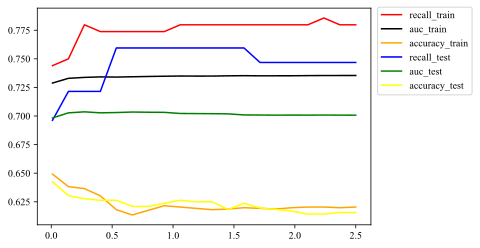

In [39]:
C_range = np.linspace(0.01,2.5,20)
recallall_train = []
aucall_train = []
scoreall_train = []
recallall_test = []
aucall_test = []
scoreall_test = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C,cache_size = 5000
             ,class_weight = {1:8.877551}
             ).fit(Xtrain, Ytrain)
    
    #训练集结果
    result_train = clf.predict(Xtrain)
    score_train = clf.score(Xtrain,Ytrain)
    recall_train = recall_score(Ytrain, result_train)
    CM_2= CM(Ytrain, result_train,labels=[1,0])
    auc_train = roc_auc_score(Ytrain,clf.decision_function(Xtrain))
    specificity_train = CM_2[1,1]/CM_2[1,:].sum()
    recallall_train.append(recall_train)
    aucall_train.append(auc_train)
    scoreall_train.append(score_train)
    print("under C %f, training accuracy is %f,sensitivity is %f,specificity is %f,auc is %f" %(C,score_train,recall_train,specificity_train,auc_train))
    #测试集结果
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    CM_1= CM(Ytest, result,labels=[1,0])
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    specificity_test = CM_1[1,1]/CM_1[1,:].sum()
    recallall_test.append(recall)
    aucall_test.append(auc)
    scoreall_test.append(score)
    print("under C %f, testing accuracy is %f,sensitivity is %f,specificity is %f,auc is %f" %(C,score,recall,specificity_test,auc))
    
print(max(aucall_train),C_range[aucall_train.index(max(aucall_train))])
print(max(recallall_train),C_range[recallall_train.index(max(recallall_train))])
print(max(aucall_test),C_range[aucall_test.index(max(aucall_test))])
print(max(recallall_test),C_range[recallall_test.index(max(recallall_test))])
plt.figure()
plt.plot(C_range,recallall_train,c="red",label="recall_train")
plt.plot(C_range,aucall_train,c="black",label="auc_train")
plt.plot(C_range,scoreall_train,c="orange",label="accuracy_train")
plt.plot(C_range,recallall_test,c="blue",label="recall_test")
plt.plot(C_range,aucall_test,c="green",label="auc_test")
plt.plot(C_range,scoreall_test,c="yellow",label="accuracy_test")

plt.legend(loc=(1.02,0.60))
plt.show()
# 变化差不多，不做调整

In [22]:
# 接着针对rbf核函数进行操作
irange = np.linspace(5,10,50)
for i in irange:
    clf = SVC(kernel = "rbf"
             ,gamma="auto"
             ,cache_size = 5000
             ,class_weight = {1:i}
             ).fit(Xtrain, Ytrain)
    #训练集结果
    result_train = clf.predict(Xtrain)
    score_train = clf.score(Xtrain,Ytrain)
    recall_train = recall_score(Ytrain, result_train)
    CM_2= CM(Ytrain, result_train,labels=[1,0])
    auc_train = roc_auc_score(Ytrain,clf.decision_function(Xtrain))
    specificity_train = CM_2[1,1]/CM_2[1,:].sum()
    print("under ratio 1:%f,training accuracy %f, sensitivity is %f,specificity is %f, auc is %f" % (i,score_train,recall_train,specificity_train,auc_train))
    print(CM_2)
    
    #测试集结果
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    CM_1= CM(Ytest, result,labels=[1,0])
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    specificity = CM_1[1,1]/CM_1[1,:].sum()
    print("under ratio 1:%f,testing accuracy %f, sensitivity is %f,specificity is %f, auc is %f" % (i,score,recall,specificity,auc))
    print(CM_1)
# 在测试集灵敏度特异度降的比较明显，不做讨论

under ratio 1:5.000000,training accuracy 0.785138, sensitivity is 0.511905,specificity is 0.814413, auc is 0.773703
[[  86   82]
 [ 291 1277]]
under ratio 1:5.000000,testing accuracy 0.759409, sensitivity is 0.379747,specificity is 0.804511, auc is 0.667174
[[ 30  49]
 [130 535]]
under ratio 1:5.102041,training accuracy 0.783410, sensitivity is 0.523810,specificity is 0.811224, auc is 0.774614
[[  88   80]
 [ 296 1272]]
under ratio 1:5.102041,testing accuracy 0.760753, sensitivity is 0.392405,specificity is 0.804511, auc is 0.667879
[[ 31  48]
 [130 535]]
under ratio 1:5.204082,training accuracy 0.781682, sensitivity is 0.553571,specificity is 0.806122, auc is 0.774975
[[  93   75]
 [ 304 1264]]
under ratio 1:5.204082,testing accuracy 0.758065, sensitivity is 0.392405,specificity is 0.801504, auc is 0.669516
[[ 31  48]
 [132 533]]
under ratio 1:5.306122,training accuracy 0.777650, sensitivity is 0.559524,specificity is 0.801020, auc is 0.775005
[[  94   74]
 [ 312 1256]]
under ratio 1:

under ratio 1:8.061224,training accuracy 0.673387, sensitivity is 0.750000,specificity is 0.665179, auc is 0.775742
[[ 126   42]
 [ 525 1043]]
under ratio 1:8.061224,testing accuracy 0.655914, sensitivity is 0.632911,specificity is 0.658647, auc is 0.685733
[[ 50  29]
 [227 438]]
under ratio 1:8.163265,training accuracy 0.671659, sensitivity is 0.750000,specificity is 0.663265, auc is 0.775127
[[ 126   42]
 [ 528 1040]]
under ratio 1:8.163265,testing accuracy 0.651882, sensitivity is 0.632911,specificity is 0.654135, auc is 0.685276
[[ 50  29]
 [230 435]]
under ratio 1:8.265306,training accuracy 0.670507, sensitivity is 0.755952,specificity is 0.661352, auc is 0.774481
[[ 127   41]
 [ 531 1037]]
under ratio 1:8.265306,testing accuracy 0.645161, sensitivity is 0.645570,specificity is 0.645113, auc is 0.684648
[[ 51  28]
 [236 429]]
under ratio 1:8.367347,training accuracy 0.667051, sensitivity is 0.761905,specificity is 0.656888, auc is 0.773866
[[ 128   40]
 [ 538 1030]]
under ratio 1:

training accuracy 0.621544, sensitivity is 0.779762,specificity is 0.604592, auc is 0.734929
[[131  37]
 [620 948]]
testing accuracy 0.626344, sensitivity is 0.759494,specificity is 0.610526, auc is 0.702560
[[ 60  19]
 [259 406]]


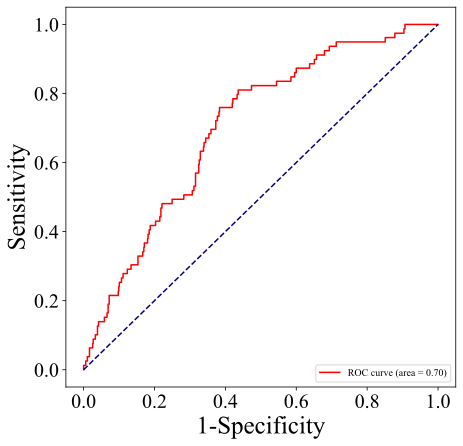

In [42]:
# 选择确定的参数建模
clf = SVC(kernel = "linear"
          ,gamma="auto"
          ,cache_size = 5000
          ,class_weight ={1:8.877551} 
          ).fit(Xtrain, Ytrain)
#训练集结果
result_train = clf.predict(Xtrain)
score_train = clf.score(Xtrain,Ytrain)
recall_train = recall_score(Ytrain, result_train)
CM_2= CM(Ytrain, result_train,labels=[1,0])
auc_train = roc_auc_score(Ytrain,clf.decision_function(Xtrain))
specificity_train = CM_2[1,1]/CM_2[1,:].sum()
print("training accuracy %f, sensitivity is %f,specificity is %f, auc is %f" % (score_train,recall_train,specificity_train,auc_train))
print(CM_2)
    
#测试集结果
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
CM_1= CM(Ytest, result,labels=[1,0])
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
specificity = CM_1[1,1]/CM_1[1,:].sum()
print("testing accuracy %f, sensitivity is %f,specificity is %f, auc is %f" % (score,recall,specificity,auc))
print(CM_1)

plt.rc('font',family='Times New Roman')
lw = 1.5 
FPR, Recall,thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)
area = roc_auc_score(Ytest,clf.decision_function(Xtest))
plt.figure(figsize=(7,7))
plt.plot(FPR, Recall, color='red',label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.tick_params(labelsize=20)
plt.xlabel('1-Specificity',fontsize=25)
plt.ylabel('Sensitivity',fontsize=25)
plt.legend(loc="lower right")
plt.show()

In [23]:
# 筛选变量的重要性
svc = SVC(kernel = "linear"
          ,gamma="auto"
          ,cache_size = 5000
          ,class_weight ={1:8.877551} 
          )
rfe = RFE(estimator=svc, n_features_to_select=5, step=1).fit(Xtrain, Ytrain)

print(rfe.support_)

[False  True False False False  True  True  True  True False]


[5 1 2 4 3 1 1 1 1 6]


<Figure size 864x432 with 0 Axes>

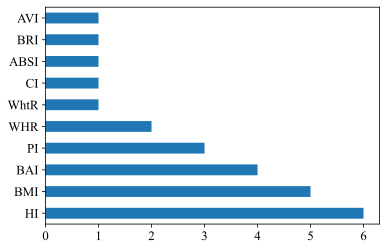

In [27]:
print(rfe.ranking_)
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(12,6),facecolor='white')

index = [ 'BMI', 'WhtR', 'WHR', 'BAI', 'PI', 'CI', 'ABSI', 'BRI', 'AVI', 'HI']
svm_feature_importance = pd.DataFrame(rfe.ranking_, index=index,columns=['score']).sort_values(by='score', ascending=False)

# 水平条形图绘制
svm_feature_importance.plot(kind='barh', legend=False)
plt.tick_params(labelsize=13)
plt.savefig(".'" + "SVM特征选择" + "'.png",dpi=300)

<Figure size 864x432 with 0 Axes>

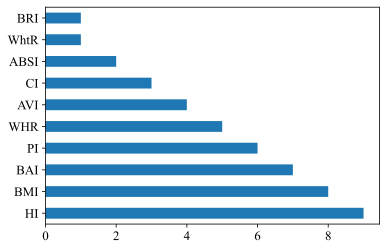

In [48]:
times = time()
clf = SVC(kernel = "linear"
         ,gamma="auto"
         ,cache_size = 5000
         ,class_weight = {1:8.755102} #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比例
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.631720, recall is 0.721519', auc is 0.703055
00:00:382821


under C 0.010000, testing accuracy is 0.642473,recall is 0.658228', auc is 0.698373
00:00:206794
under C 0.141053, testing accuracy is 0.634409,recall is 0.696203', auc is 0.702979
00:00:270399
under C 0.272105, testing accuracy is 0.630376,recall is 0.708861', auc is 0.703550
00:00:301337
under C 0.403158, testing accuracy is 0.627688,recall is 0.708861', auc is 0.703112
00:00:331613
under C 0.534211, testing accuracy is 0.629032,recall is 0.708861', auc is 0.702732
00:00:318252
under C 0.665263, testing accuracy is 0.630376,recall is 0.708861', auc is 0.702884
00:00:352502
under C 0.796316, testing accuracy is 0.631720,recall is 0.721519', auc is 0.703626
00:00:414329
under C 0.927368, testing accuracy is 0.634409,recall is 0.746835', auc is 0.703017
00:00:395212
under C 1.058421, testing accuracy is 0.633065,recall is 0.734177', auc is 0.702751
00:00:433271
under C 1.189474, testing accuracy is 0.631720,recall is 0.746835', auc is 0.702484
00:00:506433
under C 1.320526, testing accu

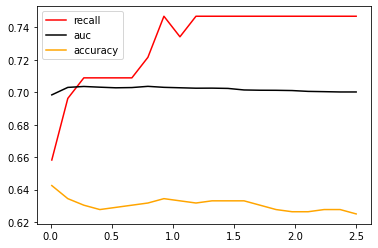

In [52]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,2.5,20)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C,cache_size = 5000
             ,class_weight = {1:8.755102}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" %(C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
    
print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend()
plt.show()

In [53]:
clf = SVC(kernel = "linear"
         ,gamma="auto"
         ,C= 0.927368
         ,cache_size = 5000
         ,class_weight = {1:8.755102} #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比例
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc))

testing accuracy 0.634409, recall is 0.746835', auc is 0.703017


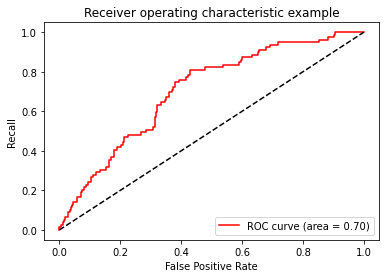

In [56]:
FPR, Recall,thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)
area = roc_auc_score(Ytest,clf.decision_function(Xtest))
plt.figure()
plt.plot(FPR, Recall, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [57]:
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex]

-0.11821869657686285

In [58]:
from sklearn.metrics import accuracy_score as AC
times = time()
clf = SVC(kernel = "linear"
         ,gamma="auto"
         ,C= 0.927368
         ,cache_size = 5000
         ,class_weight = {1:8.755102}
         ).fit(Xtrain, Ytrain)
prob = pd.DataFrame(clf.decision_function(Xtest))
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0
prob.loc[:,"y_pred"].isnull().sum()
#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])
print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))


testing accuracy 0.595430,recall is 0.810127
00:00:378004
